<a href="https://colab.research.google.com/github/Murega14/bank_marketing/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('bank-direct-marketing-campaigns.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,43,unemployed,married,university.degree,unknown,yes,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
8837,31,admin.,married,basic.9y,no,no,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
8838,32,services,single,basic.9y,no,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
8839,59,technician,married,unknown,unknown,unknown,unknown,telephone,jun,thu,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no


Contents
Input variables:

bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')


3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

other attributes:
11 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

12 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

13 - previous: number of contacts performed before this campaign and for this client (numeric)

14 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

social and economic context attributes:

15 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

16 - cons.price.idx: consumer price index - monthly indicator (numeric)

17 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

18 - euribor3m: euribor 3 month rate - daily indicator (numeric)

19 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

20 - y - has the client subscribed a term deposit? (binary: 'yes','no')

## Understanding the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8841 entries, 0 to 8840
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             8841 non-null   int64  
 1   job             8841 non-null   object 
 2   marital         8841 non-null   object 
 3   education       8841 non-null   object 
 4   default         8841 non-null   object 
 5   housing         8841 non-null   object 
 6   loan            8841 non-null   object 
 7   contact         8841 non-null   object 
 8   month           8841 non-null   object 
 9   day_of_week     8841 non-null   object 
 10  campaign        8841 non-null   int64  
 11  pdays           8841 non-null   int64  
 12  previous        8841 non-null   int64  
 13  poutcome        8841 non-null   object 
 14  emp.var.rate    8841 non-null   float64
 15  cons.price.idx  8841 non-null   float64
 16  cons.conf.idx   8841 non-null   float64
 17  euribor3m       8841 non-null   f

In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 1
dtype: int64

In [5]:
df.duplicated().sum()

250

In [6]:
#dropping the duplicated values
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8591.0,40.306018,8.943846,20.000,33.000,39.000,47.000,61.000
campaign,8591.0,2.612269,2.783108,1.000,1.000,2.000,3.000,56.000
pdays,8591.0,999.000000,0.000000,999.000,999.000,999.000,999.000,999.000
previous,8591.0,0.000000,0.000000,0.000,0.000,0.000,0.000,0.000
emp.var.rate,8591.0,1.137155,0.098829,1.100,1.100,1.100,1.100,1.400
cons.price.idx,8591.0,94.052334,0.155162,93.994,93.994,93.994,93.994,94.465
cons.conf.idx,8591.0,-37.068793,1.778923,-41.800,-36.400,-36.400,-36.400,-36.400
euribor3m,8591.0,4.858525,0.003013,4.855,4.857,4.857,4.860,4.866
nr.employed,8591.0,5195.594855,12.221858,5191.000,5191.000,5191.000,5191.000,5228.100


## EDA

In [8]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8836,43,unemployed,married,university.degree,unknown,yes,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
8837,31,admin.,married,basic.9y,no,no,no,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
8838,32,services,single,basic.9y,no,no,yes,telephone,jun,thu,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
8839,59,technician,married,unknown,unknown,unknown,unknown,telephone,jun,thu,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'basic.4y'),
  Text(1, 0, 'basic.6y'),
  Text(2, 0, 'basic.9y'),
  Text(3, 0, 'high.school'),
  Text(4, 0, 'illiterate'),
  Text(5, 0, 'professional.course'),
  Text(6, 0, 'university.degree'),
  Text(7, 0, 'unknown')])

<Figure size 1200x800 with 0 Axes>

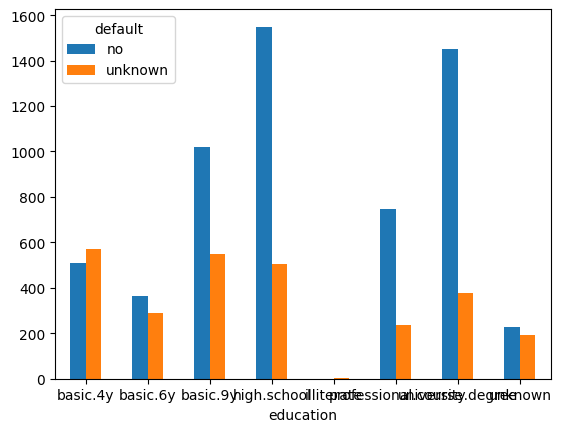

In [17]:
# @title Education level vs default status
plt.figure(figsize=(12, 8))
df.groupby(['education', 'default']).size().unstack().plot(kind='bar')
plt.xticks(rotation=0)

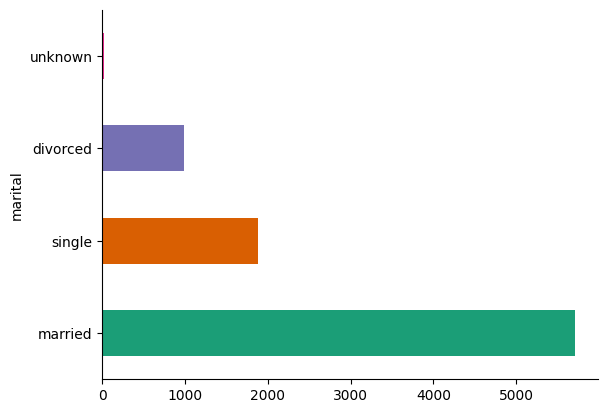

In [14]:
# @title marital

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('marital').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

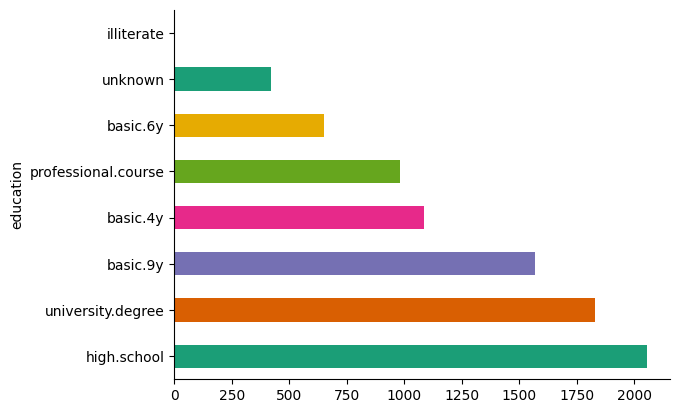

In [12]:
# @title education

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('education').size().sort_values(ascending=False).plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

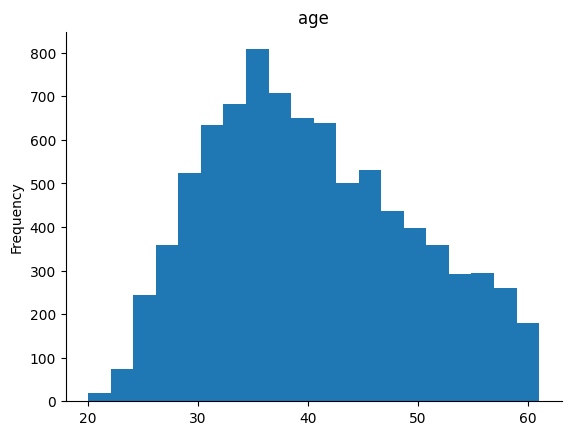

In [9]:
# @title age

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)